<a href="https://colab.research.google.com/github/leejunho12316/NLP-study/blob/main/14_%ED%95%84%EA%B8%B0%EC%B2%B4_%EC%88%AB%EC%9E%90%EB%A5%BC_%EC%95%95%EC%B6%95%ED%95%98%EB%8A%94_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

import numpy as np
import matplotlib.pyplot as plt

# 모델 만들기

In [7]:
encoding_dim=32

input_img = layers.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation = 'relu') (input_img)
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# 데이터 준비하기

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))

x_test = x_test.astype('float32')/255
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))



11490434/11490434 [==============================] - 0s 0us/step


# 모델 - 데이터 연결 훈련

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

# 평가

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

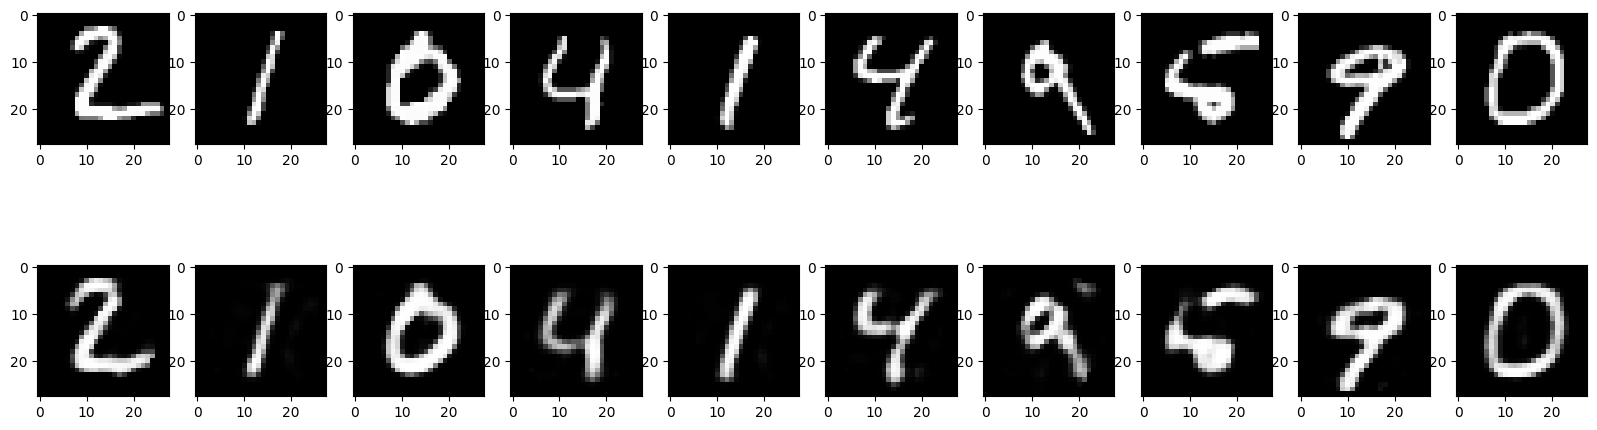

In [18]:


n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()
